In [1]:
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [2]:
train_dir = "C:/Users/alexa/Documents/Master/guitar_data/all_guitar_data/train" #link need to be adapted to other persons file location
test_dir = "C:/Users/alexa/Documents/Master/guitar_data/all_guitar_data/test" #link need to be adapted to other persons file location
val_dir = "C:/Users/alexa/Documents/Master/guitar_data/all_guitar_data/val" #link need to be adapted to other persons file location
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['Am' 'Background' 'C' 'Dm' 'Em' 'F' 'G']


In [29]:
# Rescale data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            zoom_range=0.2)

# Load data in from directories and turn into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224,224),
                                                                  batch_size=16,
                                                                  class_mode='categorical')
test_data = test_datagen.flow_from_directory(val_dir,
                                            target_size=(224, 224),
                                            batch_size=16,
                                            class_mode='categorical')

Found 3701 images belonging to 7 classes.
Found 3701 images belonging to 7 classes.
Found 840 images belonging to 7 classes.


In [30]:
# Create model 
model_1 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # filters, kernel_size
    #Conv2D(10, 3, activation='relu'),
    MaxPool2D(), #pool_size=2, padding="valid"
    Conv2D(10, 3, activation='relu'),
    #Conv2D(10, 3, activation='relu'),
    MaxPool2D(), #2
    Flatten(),
    Dense(7, activation='softmax') # 7 is number of classes
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [31]:
# Fit the model
history_1 = model_1.fit(train_data_augmented,
                       epochs=15,
                       steps_per_epoch=len(train_data_augmented),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/15
232/232 [==============================] - 235s 1s/step - loss: 1.8676 - accuracy: 0.1954 - val_loss: 1.8791 - val_accuracy: 0.1964
Epoch 2/15
232/232 [==============================] - 264s 1s/step - loss: 1.7812 - accuracy: 0.2718 - val_loss: 1.8114 - val_accuracy: 0.2500
Epoch 3/15
232/232 [==============================] - 268s 1s/step - loss: 1.7049 - accuracy: 0.3215 - val_loss: 1.8254 - val_accuracy: 0.2286
Epoch 4/15
232/232 [==============================] - 271s 1s/step - loss: 1.6645 - accuracy: 0.3210 - val_loss: 1.8588 - val_accuracy: 0.2536
Epoch 5/15
232/232 [==============================] - 278s 1s/step - loss: 1.6460 - accuracy: 0.3361 - val_loss: 1.8298 - val_accuracy: 0.2464
Epoch 6/15
232/232 [==============================] - 245s 1s/step - loss: 1.5814 - accuracy: 0.3664 - val_loss: 1.8117 - val_accuracy: 0.2726
Epoch 7/15
232/232 [==============================] - 269s 1s/step - loss: 1.5411 - accuracy: 0.3869 - val_loss: 1.7417 - val_accuracy: 0.2845

In [32]:
# Evaluate on the test data
model_1.evaluate(test_data)

53/53 [==============================] - 35s 664ms/step - loss: 1.8545 - accuracy: 0.3488


[1.8544946908950806, 0.34880951046943665]

In [7]:
# Plot validation and training
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(len(history.history['loss']))
    
    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    
    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

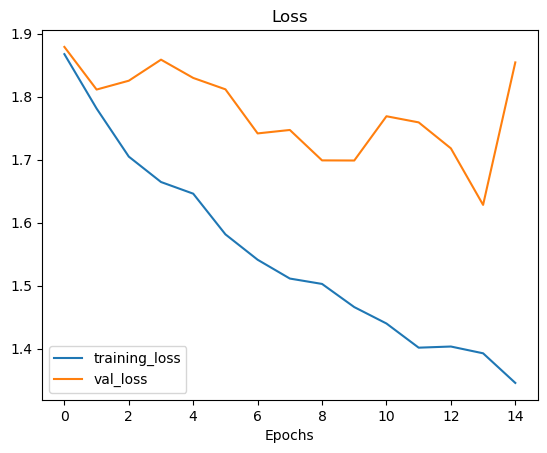

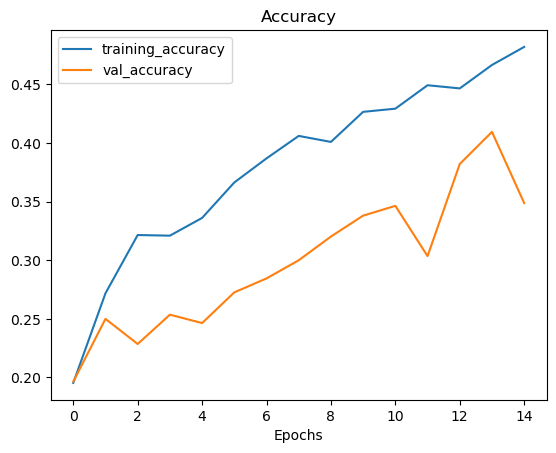

In [33]:
plot_loss_curves(history_1)

In [12]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

In [16]:
model_2 = tf.keras.applications.VGG16(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(224,224,3),
    pooling=max,
    classes=7,
    classifier_activation="softmax",
)

In [19]:
model_2.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, epsilon=0.1),
               metrics=["accuracy"])

In [20]:
history_2 = model_2.fit(train_data, 
                       epochs=15,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/15
 10/116 [=>............................] - ETA: 28:31 - loss: 1.8815 - accuracy: 0.1656

KeyboardInterrupt: 

In [ ]:
# improvements:
# faster learning rate
# different model